In [2]:
!unzip "/content/Seg.v2i.coco-segmentation (1).zip"

Archive:  /content/Seg.v2i.coco-segmentation (1).zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: train/
 extracting: train/30730637487-monarch-danaus-plexippus_jpg.rf.5ebdd75b482152f6827204135814fbe5.jpg  
 extracting: train/COM03099_jpg.rf.6a98ee5f25382d02523fe30a12d20094.jpg  
  inflating: train/_annotations.coco.json  
 extracting: train/blackswallowtailMA1a_jpg.rf.9d8193272460c520ce9be86939f7aa40.jpg  
 extracting: train/common-tiger_jpg.rf.18bc3b6b51ce3e3eaf384c8b192124f5.jpg  
 extracting: train/monarch-butterfly-2_jpg.rf.ebff917d299c20e6ba444b60042b7eeb.jpg  


In [13]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask

In [14]:
annotations_path = "/content/train/_annotations.coco.json"
with open(annotations_path) as f:
    coco_data = json.load(f)

In [15]:
# Example: Visualizing the first image and its mask
image_info = coco_data['images'][0]  # Get the first image info
print(image_info)

{'id': 0, 'license': 1, 'file_name': 'common-tiger_jpg.rf.18bc3b6b51ce3e3eaf384c8b192124f5.jpg', 'height': 430, 'width': 1000, 'date_captured': '2024-10-11T03:52:31+00:00'}


In [16]:
# Construct the full image path
image_dir = "/content/train/"  # Directory where the images are stored
image_path = os.path.join(image_dir, image_info['file_name'])  # Full image path
print(f"Image path: {image_path}")

Image path: /content/train/common-tiger_jpg.rf.18bc3b6b51ce3e3eaf384c8b192124f5.jpg


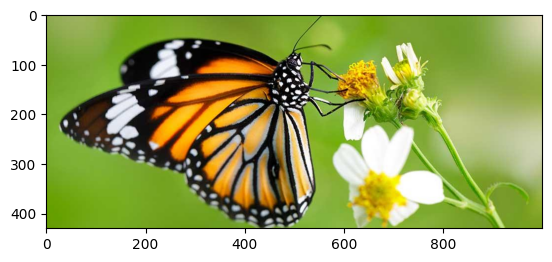

In [18]:
image = cv2.imread(image_path)  # Load image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(image)

In [19]:
coco_data['annotations']

[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'bbox': [29, 50, 513, 379],
  'area': 194427,
  'segmentation': [[29,
    218,
    29,
    232,
    67,
    258,
    125,
    278,
    146,
    279,
    186,
    297,
    269,
    318,
    282,
    330,
    288,
    348,
    320,
    379,
    349,
    392,
    375,
    413,
    403,
    416,
    434,
    429,
    493,
    425,
    505,
    419,
    521,
    401,
    535,
    377,
    541,
    358,
    542,
    331,
    518,
    191,
    527,
    175,
    537,
    173,
    537,
    170,
    528,
    162,
    532,
    146,
    521,
    138,
    511,
    112,
    515,
    92,
    510,
    80,
    502,
    77,
    485,
    92,
    469,
    97,
    421,
    73,
    357,
    56,
    269,
    50,
    224,
    57,
    177,
    78,
    152,
    102,
    150,
    123,
    157,
    144,
    114,
    159,
    71,
    180,
    40,
    202]],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 1,
  'category_id': 1,
  'bbox': [166, 208, 1248, 627],
  'area': 7

In [20]:
annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_info['id']] # Annotations for this image
annotations

[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'bbox': [29, 50, 513, 379],
  'area': 194427,
  'segmentation': [[29,
    218,
    29,
    232,
    67,
    258,
    125,
    278,
    146,
    279,
    186,
    297,
    269,
    318,
    282,
    330,
    288,
    348,
    320,
    379,
    349,
    392,
    375,
    413,
    403,
    416,
    434,
    429,
    493,
    425,
    505,
    419,
    521,
    401,
    535,
    377,
    541,
    358,
    542,
    331,
    518,
    191,
    527,
    175,
    537,
    173,
    537,
    170,
    528,
    162,
    532,
    146,
    521,
    138,
    511,
    112,
    515,
    92,
    510,
    80,
    502,
    77,
    485,
    92,
    469,
    97,
    421,
    73,
    357,
    56,
    269,
    50,
    224,
    57,
    177,
    78,
    152,
    102,
    150,
    123,
    157,
    144,
    114,
    159,
    71,
    180,
    40,
    202]],
  'iscrowd': 0}]

In [23]:
# Create a mask for the image
mask = np.zeros((image_info['height'], image_info['width']), dtype = np.uint8)
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


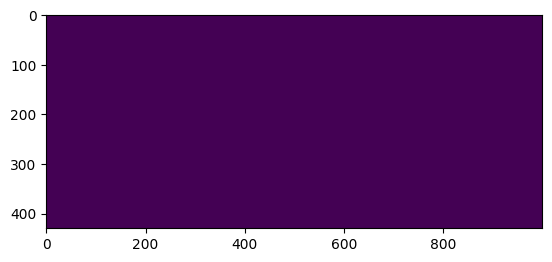

In [31]:
plt.imshow(mask)

In [35]:
# Function to create a binary mask for a single annotation
def create_binary_mask(segmentation, image_height, image_width):
  mask = np.zeros((image_height, image_width), dtype = np.uint8)

  for seg in segmentation:
    # Convert segmentation coordinates into a proper polygon
    poly = np.array(seg).reshape((len(seg) // 2, 2))
    # Create a binary mask from the polygon
    cv2.fillPoly(mask, [np.int32(poly)], 1)

  return mask

In [39]:
for ann in annotations:
    binary_mask = create_binary_mask(ann['segmentation'], image_info['height'], image_info['width'])
    mask = np.maximum(mask, binary_mask)  # Merge masks

AxesImage(size=(430, 1000))


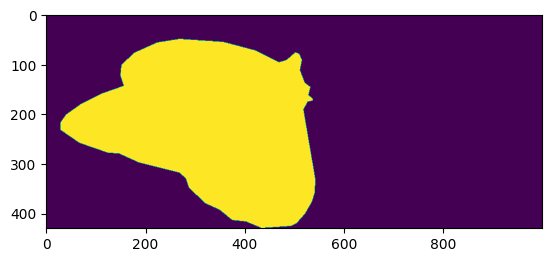

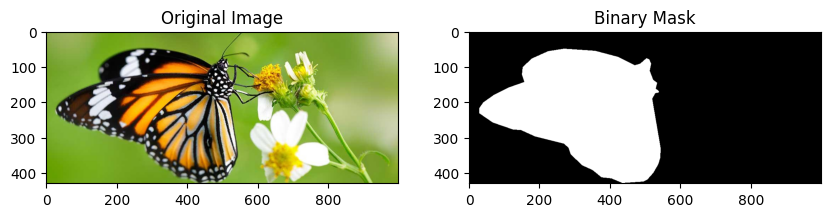

In [43]:
for ann in annotations:
    binary_mask = create_binary_mask(ann['segmentation'], image_info['height'], image_info['width'])
    print(plt.imshow(binary_mask))
    mask = np.maximum(mask, binary_mask)

# Visualize the image and mask
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap = 'gray')
plt.title("Binary Mask")

plt.show()

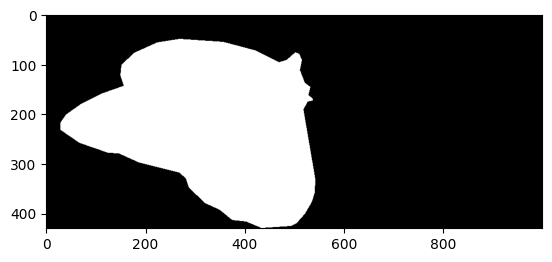

In [44]:
plt.imshow(mask, cmap='gray')

In [45]:
np.unique(mask)

array([0, 1], dtype=uint8)

In [46]:
mask_save_path = f"{image_info['file_name'].split('.')[0]}_mask.png"
mask_save_path

'common-tiger_jpg_mask.png'

In [47]:
cv2.imwrite(mask_save_path, mask)

True

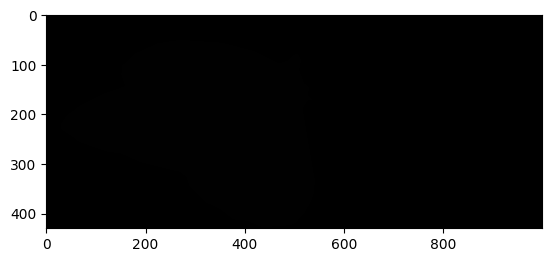

In [48]:
plt.imshow(cv2.imread(mask_save_path))

In [49]:
# Scale the mask to 0-255 for visibility
mask_scaled = mask * 255

cv2.imwrite("new_maksed_scaled.png", mask_scaled)

True

Text(0.5, 1.0, 'Binary Mask')

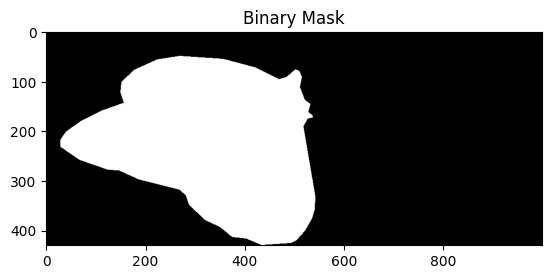

In [50]:
# Now, visualize the saved mask
saved_mask = cv2.imread("new_maksed_scaled.png", cv2.IMREAD_GRAYSCALE)  # Load the saved mask
plt.imshow(saved_mask, cmap='gray')  # Use the 'gray' colormap to visualize the mask properly
plt.title("Binary Mask")

In [59]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

class COCOProcessor:
    def __init__(self, coco_annotation_file, image_dir):
        """
        Initialize the processor with the COCO annotations and image directory.
        :param coco_annotation_file: Path to the COCO annotation JSON file.
        :param image_dir: Directory where the images are stored.
        """
        self.coco_annotation_file = coco_annotation_file
        self.image_dir = image_dir
        self.coco_data = self._load_coco_annotations()

    def _load_coco_annotations(self):
        """ Load COCO annotations from the JSON file """
        try:
            with open(self.coco_annotation_file, 'r') as f:
                coco_data = json.load(f)
            return coco_data
        except FileNotFoundError:
            print(f"Error: COCO annotation file '{self.coco_annotation_file}' not found.")
            raise

    def create_binary_mask(self, segmentation, image_height, image_width):
        """
        Create a binary mask for the provided segmentation data.
        :param segmentation: List of segmentation polygons.
        :param image_height: Height of the image.
        :param image_width: Width of the image.
        :return: Binary mask.
        """
        mask = np.zeros((image_height, image_width), dtype=np.uint8)
        for seg in segmentation:
            # Convert segmentation coordinates into a proper polygon
            poly = np.array(seg).reshape((len(seg) // 2, 2))
            # Create a binary mask from the polygon
            cv2.fillPoly(mask, [np.int32(poly)], 1)
        return mask

    def save_mask(self, mask, image_info):
        """
        Save the binary mask to a file.
        :param mask: The binary mask to be saved.
        :param image_info: Image metadata from the COCO annotations.
        :return: The file path where the mask is saved.
        """
        # Scale the mask to 0-255 for visibility when saving
        mask_scaled = mask * 255

        # Generate file path for saving
        mask_save_path = f"{self.image_dir}/{image_info['file_name'].split('.')[0]}_mask.png"
        # Save the mask
        cv2.imwrite(mask_save_path, mask_scaled)
        print(f"Mask saved successfully at {mask_save_path}")
        return mask_save_path

    def process_image(self, image_id):
        """
        Process an image by generating and saving its binary mask.
        :param image_id: The ID of the image to be processed (from COCO data).
        :return: None
        """
        # Get image info by image_id
        image_info = self.coco_data['images'][image_id]
        image_path = f"{self.image_dir}/{image_info['file_name']}"

        # Debug: Print image path to verify it
        print(f"Trying to load image from: {image_path}")

        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Image file {image_info['file_name']} not found in directory {self.image_dir}.")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB


        # Get annotations for the image
        annotations = [ann for ann in self.coco_data['annotations'] if ann['image_id'] == image_info['id']]

        # Create the binary mask
        mask = np.zeros((image_info['height'], image_info['width']), dtype=np.uint8)
        for ann in annotations:
            binary_mask = self.create_binary_mask(ann['segmentation'], image_info['height'], image_info['width'])
            mask = np.maximum(mask, binary_mask)  # Merge all masks

        # Save the mask
        mask_save_path = self.save_mask(mask, image_info)

        # Visualize the original image and mask
        self.visualize(image, mask_save_path)

    def visualize(self, image, mask_save_path):
        """
        Visualize the original image and the corresponding binary mask.
        :param image: The original image (RGB format).
        :param mask_save_path: The file path of the saved mask.
        :return: None
        """
        # Load the saved mask
        saved_mask = cv2.imread(mask_save_path, cv2.IMREAD_GRAYSCALE)

        # Display the original image and the mask
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Original Image")

        plt.subplot(1, 2, 2)
        plt.imshow(saved_mask, cmap='gray')
        plt.title("Binary Mask")

        plt.show()

Trying to load image from: /content/train//common-tiger_jpg.rf.18bc3b6b51ce3e3eaf384c8b192124f5.jpg
Mask saved successfully at /content/train//common-tiger_jpg_mask.png


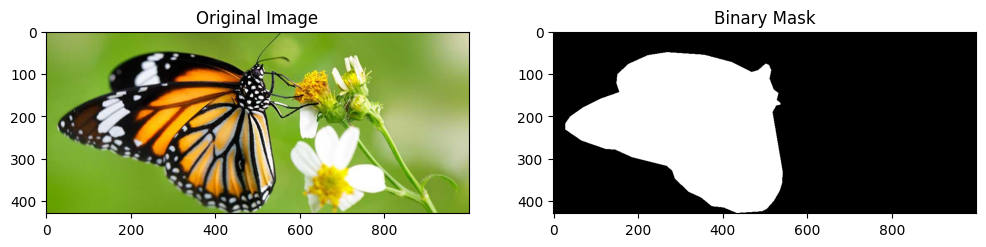

Trying to load image from: /content/train//30730637487-monarch-danaus-plexippus_jpg.rf.5ebdd75b482152f6827204135814fbe5.jpg
Mask saved successfully at /content/train//30730637487-monarch-danaus-plexippus_jpg_mask.png


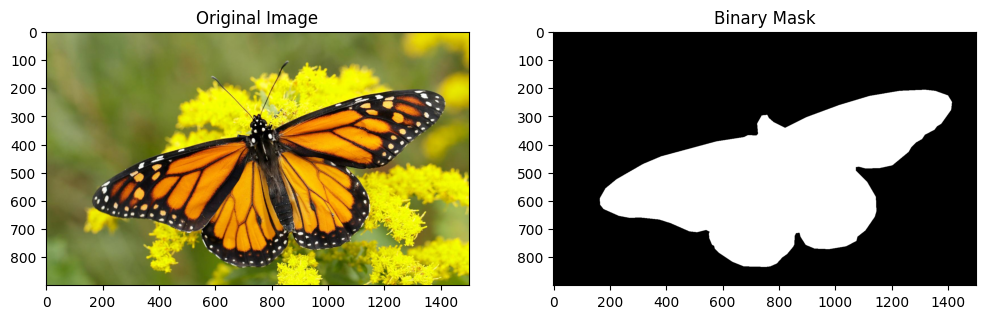

Trying to load image from: /content/train//blackswallowtailMA1a_jpg.rf.9d8193272460c520ce9be86939f7aa40.jpg
Mask saved successfully at /content/train//blackswallowtailMA1a_jpg_mask.png


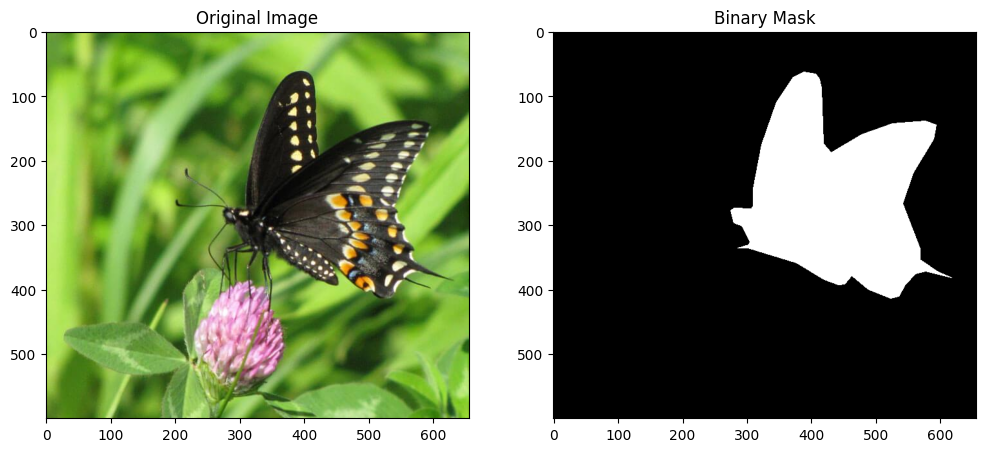

Trying to load image from: /content/train//monarch-butterfly-2_jpg.rf.ebff917d299c20e6ba444b60042b7eeb.jpg
Mask saved successfully at /content/train//monarch-butterfly-2_jpg_mask.png


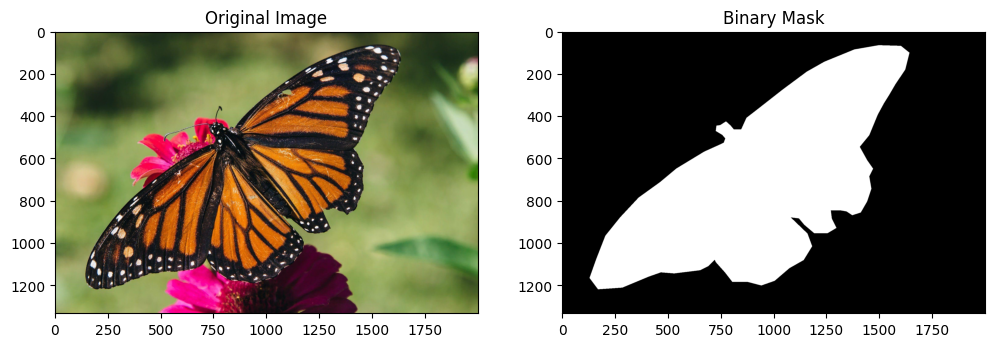

Trying to load image from: /content/train//COM03099_jpg.rf.6a98ee5f25382d02523fe30a12d20094.jpg
Mask saved successfully at /content/train//COM03099_jpg_mask.png


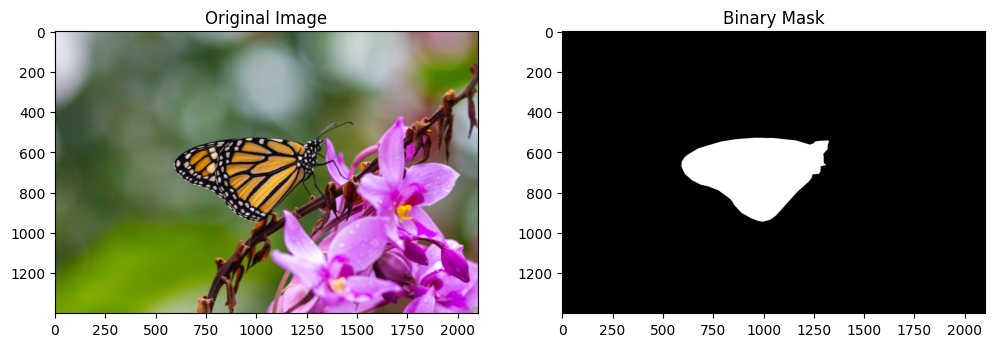

In [60]:
# Example Usage:
coco_annotation_file = '/content/train/_annotations.coco.json'
image_dir = "/content/train/"

# Create an instance of COCOProcessor
processor = COCOProcessor(coco_annotation_file, image_dir)

# Process the first image (image_id = 0)
for i in range(5):
  processor.process_image(i)